<a href="https://colab.research.google.com/github/praneshnikhar/DL-projects/blob/main/microsoft_lida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

path = "/content/housing.csv"

data = pd.read_csv(path)

data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


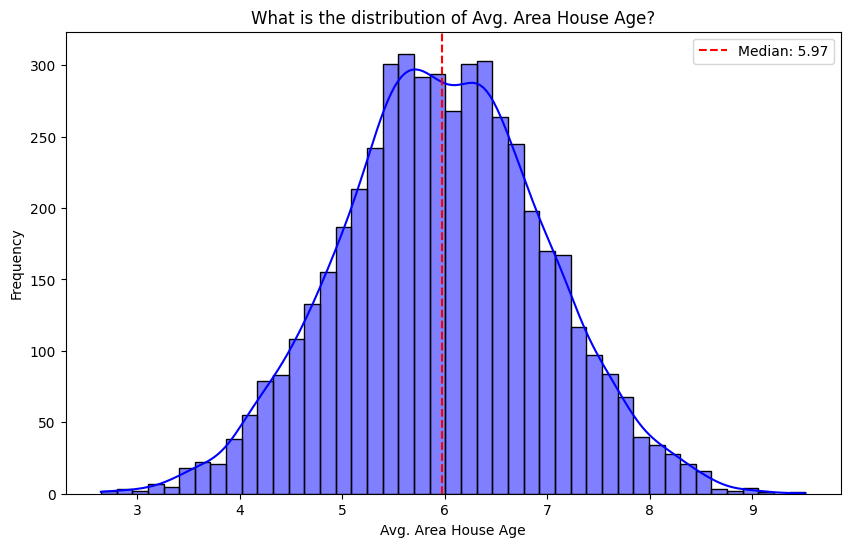

In [12]:


import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# i. Function to plot the distribution of housing_median_age
def plot(data: pd.DataFrame):
    # Clean column names
    data.columns = data.columns.str.strip()

    col = 'Avg. Area House Age'  # Updated column name

    if col not in data.columns:
        raise ValueError(f"Column '{col}' not found in DataFrame.")

    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=col, kde=True, color='blue', alpha=0.5)
    median_val = data[col].median()
    plt.axvline(x=median_val, color='red', linestyle='--', label=f'Median: {median_val:,.2f}')
    plt.legend()
    plt.title('What is the distribution of Avg. Area House Age?', wrap=True)
    plt.xlabel('Avg. Area House Age')
    plt.ylabel('Frequency')
    return plt


chart = plot(data)


In [14]:
!pip install python-dotenv

from dotenv import load_dotenv
load_dotenv()

False

In [18]:
import os
os.environ["OPENAI_API_KEY"] = "your-openai-key-here"

from lida import Manager, llm
lida = Manager(text_gen=llm("openai"))


In [19]:
!pip install lida

from lida import Manager, llm

lida = Manager(text_gen = llm("openai"))

In [21]:
summary = lida.summarize("/content/housing.csv")

summary

{'name': 'housing.csv',
 'file_name': 'housing.csv',
 'dataset_description': '',
 'fields': [{'column': 'Avg__Area_Income',
   'properties': {'dtype': 'number',
    'std': 10599.454562443792,
    'min': 35454.71466,
    'max': 102881.1209,
    'samples': [63362.22547, 57853.3302, 78606.74714],
    'num_unique_values': 4500,
    'semantic_type': '',
    'description': ''}},
  {'column': 'Avg__Area_House_Age',
   'properties': {'dtype': 'number',
    'std': 0.9945592179175644,
    'min': 2.644304186,
    'max': 9.519088066,
    'samples': [6.140522639, 6.500094306, 7.031773829],
    'num_unique_values': 4500,
    'semantic_type': '',
    'description': ''}},
  {'column': 'Avg__Area_Number_of_Rooms',
   'properties': {'dtype': 'number',
    'std': 1.0086677910588593,
    'min': 3.236194023,
    'max': 10.75958834,
    'samples': [5.917064458, 7.316551003, 5.093526735],
    'num_unique_values': 4500,
    'semantic_type': '',
    'description': ''}},
  {'column': 'Avg__Area_Number_of_Bedroo

In [22]:
pd.DataFrame(summary["fields"])

,column,properties
0,Avg__Area_Income,"{'dtype': 'number', 'std': 10599.454562443792,..."
1,Avg__Area_House_Age,"{'dtype': 'number', 'std': 0.9945592179175644,..."
2,Avg__Area_Number_of_Rooms,"{'dtype': 'number', 'std': 1.0086677910588593,..."
3,Avg__Area_Number_of_Bedrooms,"{'dtype': 'number', 'std': 1.232414372683507, ..."
4,Area_Population,"{'dtype': 'number', 'std': 9947.49976285065, '..."
5,Price,"{'dtype': 'number', 'std': 354682.3496897248, ..."
6,Address,"{'dtype': 'string', 'samples': ['14640 James F..."


In [ ]:
goals = lida.goals(summary, n=3)
pd.DataFrame(goals)

In [ ]:
from lida.utils import plot_raster

charts = lida.visualize(summary=summary, goal=goals[0])

charts

In [ ]:
plot_raster(charts[0].raster)